## Predvidjanje vrednosti bitkoina za DAYS_TO_PREDICT dana pomocu Linearne regresije

**Koraci:**
1. Ucitavanje i pretprocesiranje podataka
2. Prikaz zavisnosti kolona "Open" i "Close"
3. Podela podataka
4. Odredjivanje ciljne promenljive
5. Skaliranje podataka
6. Kreiranje i treniranje modela
7. Predvidjanje modela
8. Evaluacija modela
9. Prikaz rezultata

In [83]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Ucitavanje biblioteka

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

%run preprocessing.ipynb

### Ucitavanje skupa podataka

In [85]:
data = preprocess_data(file_name = 'bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [86]:
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30


In [87]:
data.corr()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,0.650719,0.650644,0.650803,0.650714,-0.103926,0.228190,0.650737
Open,0.650719,1.000000,0.999999,0.999999,0.999999,-0.051860,0.344074,0.999999
High,0.650644,0.999999,1.000000,0.999998,0.999999,-0.051717,0.344498,0.999999
Low,0.650803,0.999999,0.999998,1.000000,0.999999,-0.052040,0.343541,1.000000
Close,0.650714,0.999999,0.999999,0.999999,1.000000,-0.051877,0.344036,1.000000
Volume_(BTC),-0.103926,-0.051860,-0.051717,-0.052040,-0.051877,1.000000,0.352038,-0.051887
Volume_(Currency),0.228190,0.344074,0.344498,0.343541,0.344036,0.352038,1.000000,0.344010
Weighted_Price,0.650737,0.999999,0.999999,1.000000,1.000000,-0.051887,0.344010,1.000000


In [88]:
abs(data.corr())['Close'].sort_values(ascending=False)

Close                1.000000
Weighted_Price       1.000000
High                 0.999999
Low                  0.999999
Open                 0.999999
Timestamp            0.650714
Volume_(Currency)    0.344036
Volume_(BTC)         0.051877
Name: Close, dtype: float64

### **Vizuelni prikaz zavisnosti atributa Open i Close**

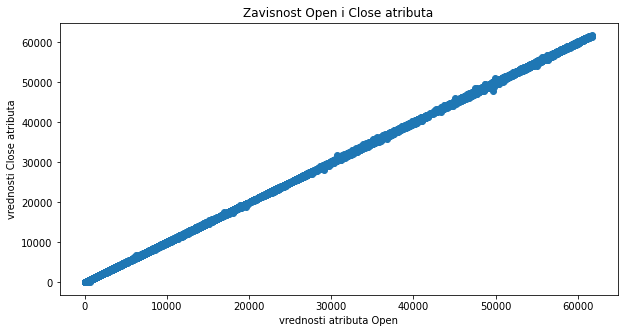

In [89]:
plt.figure(figsize=(10,5))
plt.scatter(x=data['Open'], y=data['Close'])
plt.xlabel('vrednosti atributa Open')
plt.ylabel('vrednosti Close atributa')
plt.title('Zavisnost Open i Close atributa')
plt.show()

<AxesSubplot:xlabel='Open', ylabel='Close'>

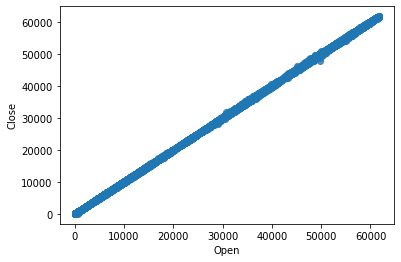

In [90]:
# Vizualizacija Open-Close veze (2. nacin)

sns.regplot(x = data['Open'], y = data['Close'], data = data, fit_reg = False)

### **Podela skupa podataka**

In [91]:
train, test = data_split(data, test_size = 0.2)

### **Odredjivanje ciljne promenljive**

In [92]:
# Trening skup

X_train = np.array(train['Open']).reshape(-1,1) # skup atributa
y_train = np.array(train['Close']).reshape(-1,1) # ciljna promenljiva koju treba predvideti


# Test skup

X_test = np.array(test['Open']).reshape(-1,1) # skup atributa
y_test = np.array(test['Close']).reshape(-1,1) # ciljna promenljiva koju treba predvideti

In [93]:
X_train, X_test

(array([[4.39000e+00],
        [4.39000e+00],
        [4.50000e+00],
        ...,
        [9.01334e+03],
        [9.01334e+03],
        [9.01300e+03]]),
 array([[ 9011.74],
        [ 9007.76],
        [ 9010.  ],
        ...,
        [58693.43],
        [58742.18],
        [58767.75]]))

In [94]:
y_train, y_test

(array([[4.39000e+00],
        [4.39000e+00],
        [4.57000e+00],
        ...,
        [9.01334e+03],
        [9.02000e+03],
        [9.01500e+03]]),
 array([[ 9014.99],
        [ 9013.45],
        [ 9007.9 ],
        ...,
        [58723.84],
        [58760.59],
        [58778.18]]))

### **Skaliranje podataka**

In [95]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
X_train_scaled, X_test_scaled

(array([[3.00071814e-05],
        [3.00071814e-05],
        [3.56017406e-05],
        ...,
        [4.58221866e-01],
        [4.58221866e-01],
        [4.58204574e-01]]),
 array([[0.45814049],
        [0.45793807],
        [0.45805199],
        ...,
        [2.98493283],
        [2.98741224],
        [2.98871272]]))

In [97]:
y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

### **Kreiranje i treniranje modela**

In [98]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

print("Intercept: {:,.3f}".format(lm.intercept_))
print("Coefficient: {:,.3f}".format(lm.coef_[0]))

Intercept: 3.832
Coefficient: 19,661.372


### **Predvidjanje modela**

In [107]:
predicted = lm.predict(X_test_scaled)

### **Evaluacija modela**

In [100]:
# MAE (srednje apsolutne greske)

mae = mean_absolute_error(y_test, predicted)
print("MAE: {:,.3f}".format(mae))

MAE: 13.462


In [101]:
# MSE (srednje kvadratne greske)

mse = mean_squared_error(y_test, predicted)
print("MSE: {:,.3f}".format(mse))

MSE: 905.518


In [108]:
# Koeficijent determinacije (R2 skor)

r2 = r2_score(y_test, predicted)
print("R2 skor: {:,.3f}".format(r2))

R2 skor: 1.000


### **Vizuelni prikaz rezultata**

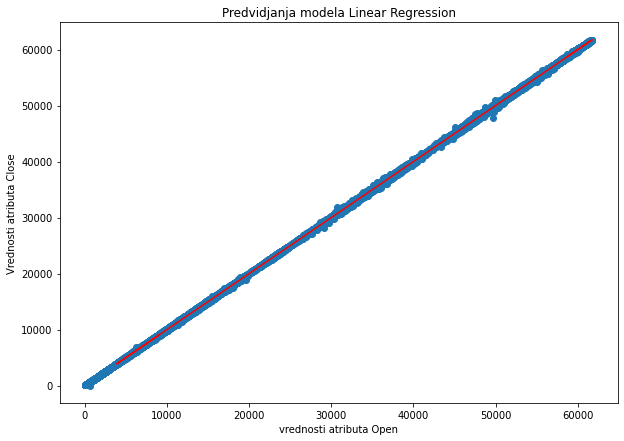

In [106]:
plt.figure(figsize=(10,7))
plt.scatter(x=data['Open'], y=data['Close'])
plt.plot(scaler.inverse_transform(X_test_scaled), predicted, color='red')
plt.xlabel('vrednosti atributa Open')
plt.ylabel('Vrednosti atributa Close')
plt.title('Predvidjanja modela Linear Regression')
plt.show()